In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
#Preparing data
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris_predictors = pd.DataFrame(iris.data)
iris_target = pd.DataFrame(iris.target)

In [5]:
type(iris_predictors)

pandas.core.frame.DataFrame

In [6]:
iris_predictors.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [7]:
iris_predictors

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
iris_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
#Check whether this dataframe has any nan value
iris_predictors.isnull().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
dtype: bool

In [9]:
#Split data into training and testing set
pred_train, pred_test, tar_train, tar_test  =  train_test_split(iris_predictors, iris_target, test_size=.2)

In [10]:
pred_train.shape

(120, 4)

In [11]:
#Build Decision Tree model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [12]:
#Predicting the testing cases, in order to evaluate the model
predictions=classifier.predict(pred_test)

In [13]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [14]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9666666666666667

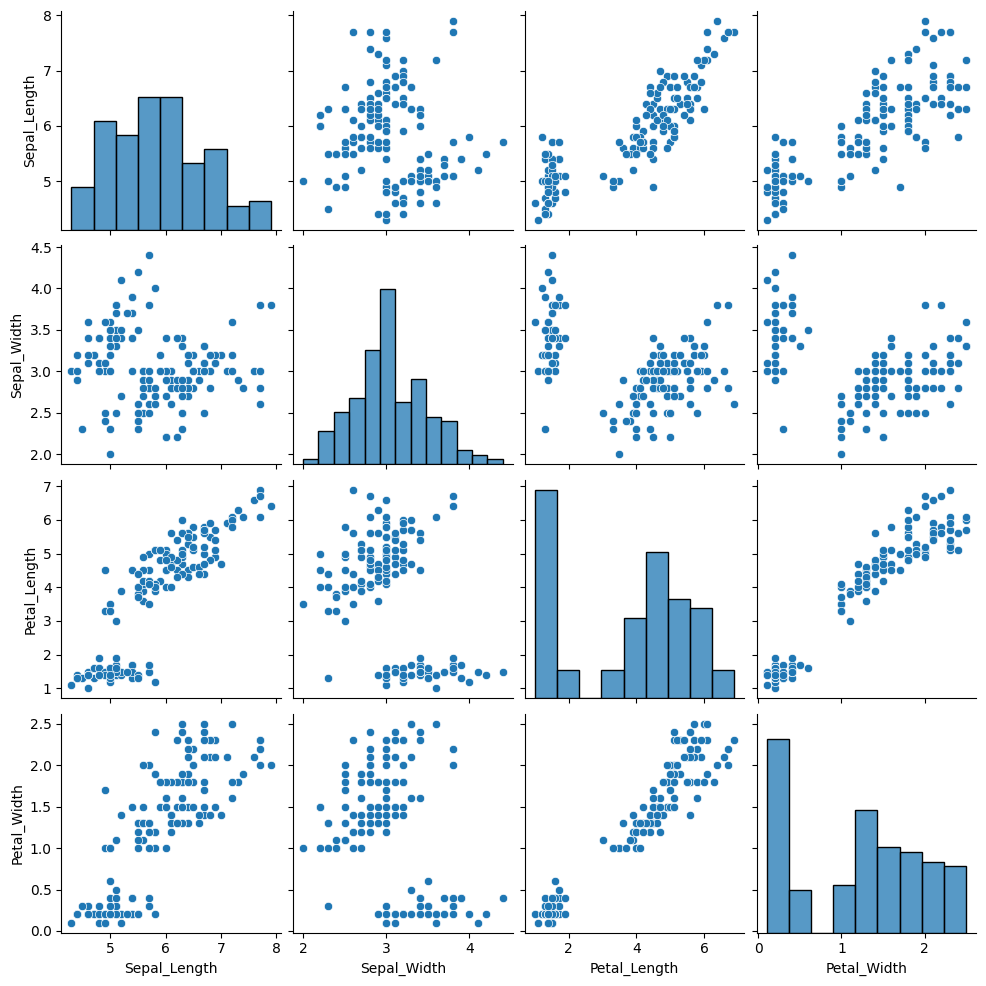

In [15]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(iris_predictors)

In [20]:
irisDataFrame = pd.concat([iris_predictors,iris_target], axis = 1, ignore_index = True)

In [21]:
irisDataFrame

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
irisDataFrame.columns = ['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width','Class']

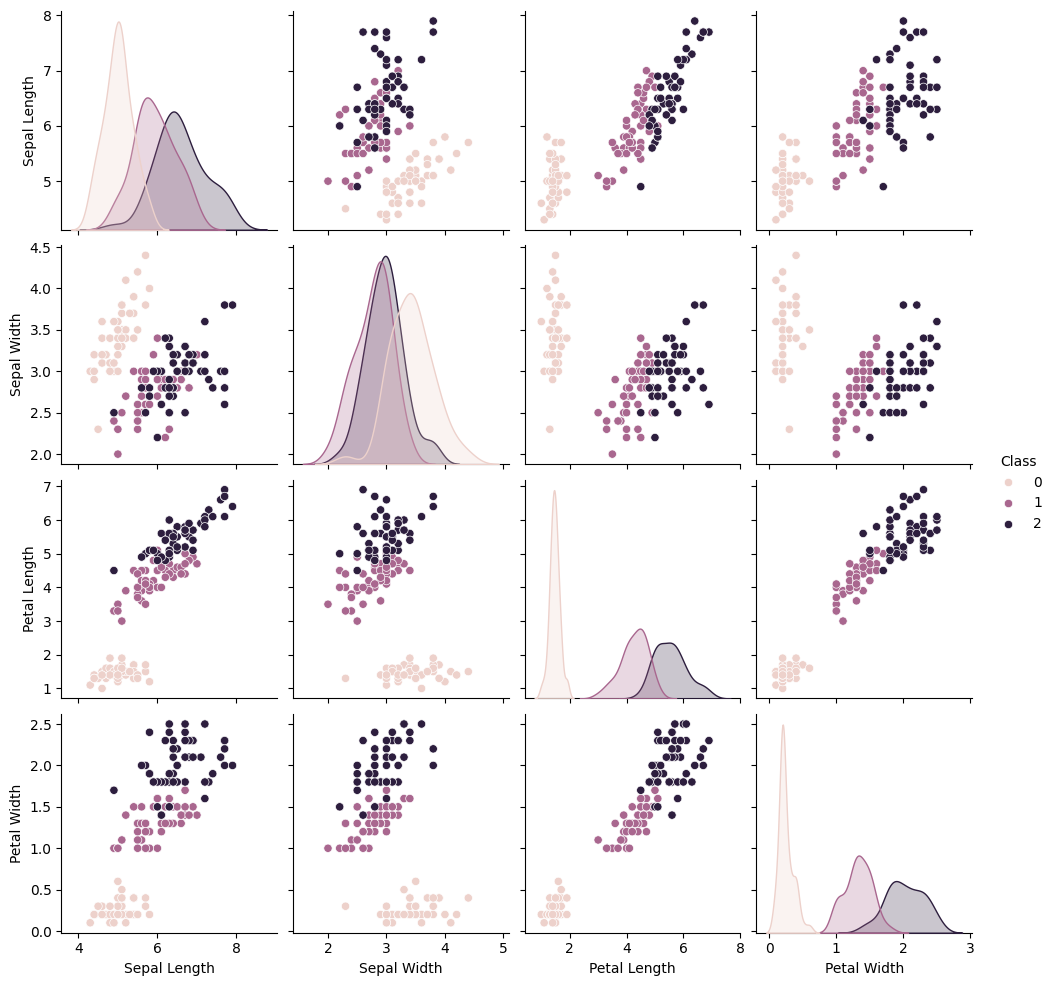

In [23]:
sns.pairplot(irisDataFrame,vars = ['Sepal Length','Sepal Width','Petal Length','Petal Width'], hue = 'Class' )

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25)
model=classifier.fit(pred_train,tar_train)

<ipython-input-24-ee20c29ed441>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=classifier.fit(pred_train,tar_train)


In [25]:
#Predicting
predictions=model.predict(pred_test)

In [26]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

In [27]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9333333333333333

In [28]:
help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [29]:
classifier2=RandomForestClassifier(n_estimators=100)
model2=classifier2.fit(pred_train,tar_train)

<ipython-input-29-0b2dee7fc402>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2=classifier2.fit(pred_train,tar_train)


In [30]:
#Predicting
predictions2=model2.predict(pred_test)

In [31]:
sklearn.metrics.confusion_matrix(tar_test,predictions2)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

In [32]:
model2.feature_importances_

array([0.11141213, 0.02770969, 0.38960337, 0.47127481])

In [33]:
irisDataFrame

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
#Checking how many trees will return the best result
trees=range(100)
accuracy=np.zeros(100)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

<ipython-input-34-6ef0fbe0a4c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=classifier.fit(pred_train,tar_train)
<ipython-input-34-6ef0fbe0a4c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=classifier.fit(pred_train,tar_train)
<ipython-input-34-6ef0fbe0a4c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=classifier.fit(pred_train,tar_train)
<ipython-input-34-6ef0fbe0a4c5>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=classifier.fit(pred_train,tar_train)
<ipython-input-34-6ef0fbe0a4c5>:7: DataConversionWarning: A column-vecto

In [35]:
accuracy

array([0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.96666667,
       0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.96666667,
       0.93333333, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
       0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.96666667,
       0.93333333, 0.93333333, 0.93333333, 0.96666667, 0.96666667,
       0.93333333, 0.96666667, 0.93333333, 0.96666667, 0.93333333,
       0.93333333, 0.96666667, 0.93333333, 0.93333333, 0.96666667,
       0.96666667, 0.93333333, 0.96666667, 0.96666667, 0.96666667,
       0.93333333, 0.96666667, 0.93333333, 0.93333333, 0.96666667,
       0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.96666667,
       0.93333333, 0.93333333, 0.96666667, 0.93333333, 0.93333333,
       0.96666667, 0.96666667, 0.93333333, 0.96666667, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.96666667, 0.93333

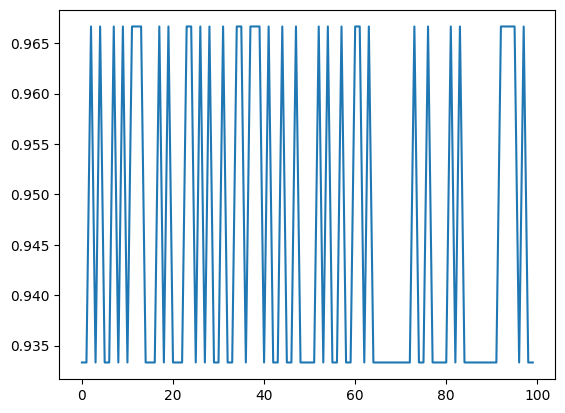

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.cla()
plt.plot(trees, accuracy)